In [97]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [146]:
df= pd.read_csv('stage2.csv',index_col=0)

In [147]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.861703,4413.062005,60.0,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.861703,4413.062005,60.0,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.861703,179.426579,60.0,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0


In [148]:
df= df.drop(['Land Area(Km2)','Density\\n(P/Km2)'],axis=1)

In [149]:
unique_years = df['Year'].unique()
cols= list(df.columns)
cols.remove('Entity')
cols.remove('Year')
for col in cols:
    total_by_year = df.groupby('Year')[col].sum()
    for year in unique_years:
        df.loc[df['Year'] == year, col] = df[df['Year'] == year][col] / total_by_year[year] * 100

    

    


<AxesSubplot:>

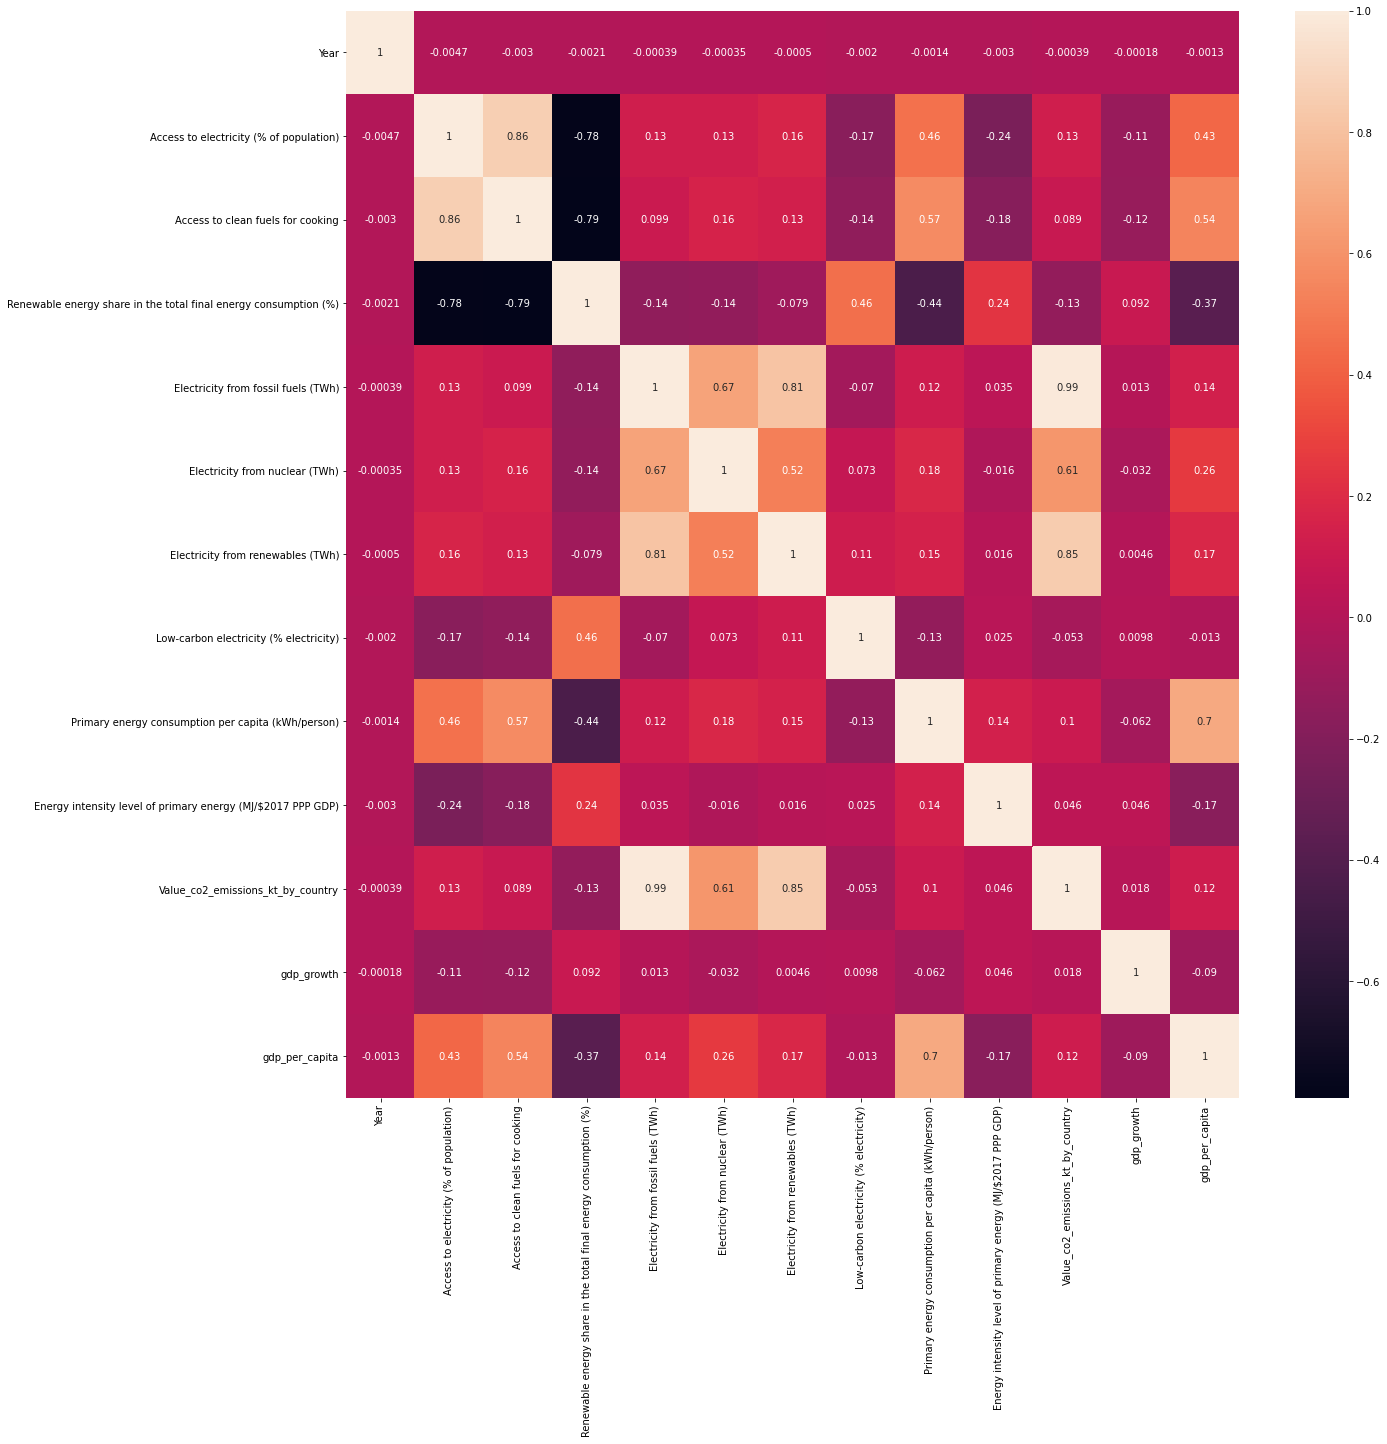

In [150]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True)

In [103]:
# df.to_csv("GlobalEmission%age.csv")

In [151]:
countries= df.groupby('Entity').mean()['Value_co2_emissions_kt_by_country'].sort_values(ascending=False)

In [152]:
group_A= list(countries[countries>20].index)
group_B= list(list(countries[(countries<10) & (countries>1)].index))
group_C= list(list(countries[countries<1].index))

In [153]:
df_a= df[df['Entity'].isin(group_A)]
df_b=df[df['Entity'].isin(group_B)]
df_c=df[df['Entity'].isin(group_C)]

In [154]:
df_a['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [155]:
df_a_2010= df_a[df_a['Year']==2010].drop(['Entity','Year'],axis=1)
df_b_2010= df_b[df_b['Year']==2010].drop(['Entity','Year'],axis=1)
df_c_2010= df_c[df_c['Year']==2010].drop(['Entity','Year'],axis=1)


In [156]:
df_a_2010.head()

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita
724,0.789220,0.533098,0.225826,27.458969,3.209185,20.958117,0.342958,0.490552,1.019233,31.570517,1.528969,0.198202
3512,0.791595,0.958810,0.137043,23.796056,34.649669,11.312981,0.499197,1.898276,0.630030,20.086525,0.368557,2.111037


In [157]:
df_a= df_a[df_a['Year']!=2010].drop(['Entity','Year'],axis=1)
df_b= df_b[df_b['Year']!=2010].drop(['Entity','Year'],axis=1)
df_c= df_c[df_c['Year']!=2010].drop(['Entity','Year'],axis=1)

In [53]:
# Group A countires

<AxesSubplot:>

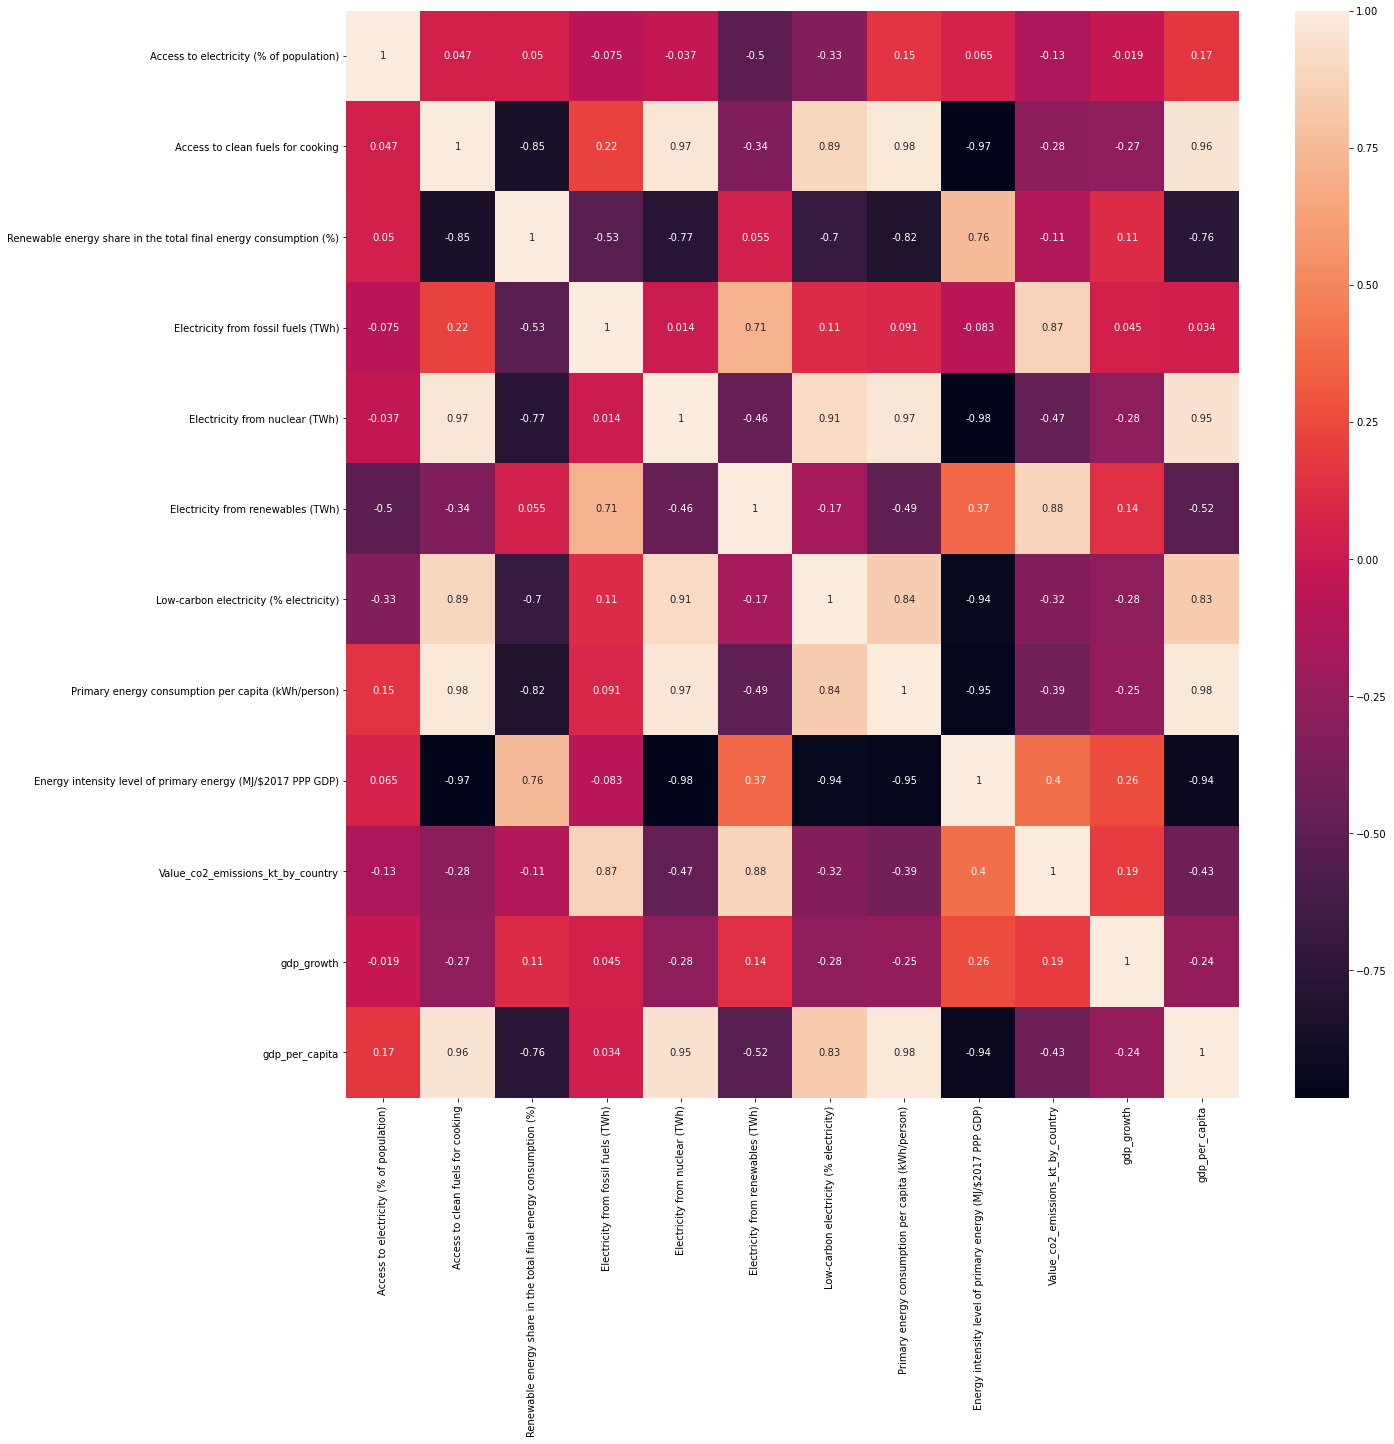

In [160]:
plt.figure(figsize=(20,20))
sns.heatmap(df_a.corr(),annot= True)

In [161]:
X= df_a.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_a['Value_co2_emissions_kt_by_country']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [163]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [164]:

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [165]:

print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.3368126415399262
r2 score 0.9479635855572786
mean squared error 2.1991616203438844
root mean square error 1.4829570527644704
mean absoute percentage error 0.0602134482589772


In [166]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})

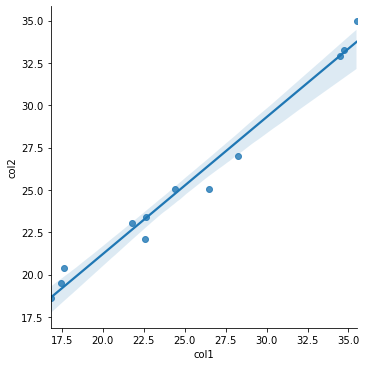

In [167]:
sns.lmplot(x='col1',y='col2',data=check)

In [168]:
coef= pd.DataFrame(data={'Coef':lasso_model.coef_,'Features':X_test.columns})

In [169]:
coef

,Coef,Features
0,0.000000,Access to electricity (% of population)
1,-0.000000,Access to clean fuels for cooking
2,-0.000000,Renewable energy share in the total final ener...
3,4.054894,Electricity from fossil fuels (TWh)
4,-0.300636,Electricity from nuclear (TWh)
5,1.574645,Electricity from renewables (TWh)
6,-0.000000,Low-carbon electricity (% electricity)
7,-0.000000,Primary energy consumption per capita (kWh/per...
8,1.009658,Energy intensity level of primary energy (MJ/$...
9,0.000000,gdp_growth


In [170]:
X= df_a.drop(['Value_co2_emissions_kt_by_country','Low-carbon electricity (% electricity)','Electricity from renewables (TWh)'],axis= 1)
y= df_a['Value_co2_emissions_kt_by_country']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [172]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [174]:

print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.6587877522314598
r2 score 0.9264990654546877
mean squared error 3.106294621613152
root mean square error 1.762468332088027
mean absoute percentage error 0.06748023719729342


In [175]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})

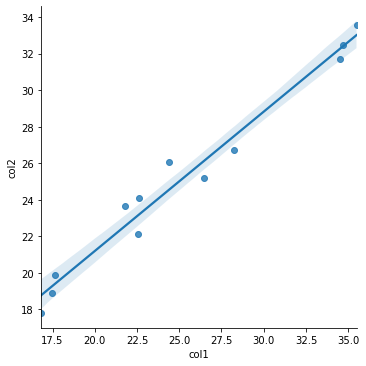

In [176]:
sns.lmplot(x='col1',y='col2',data=check)

In [177]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [178]:
grid_search= GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, cv=5,n_jobs=-1,refit=True,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [179]:
predictions= grid_search.predict(X_test)

In [180]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 1.2466403431345416
r2 score 0.9277335412826025
mean squared error 3.054123235650716
root mean square error 1.747604999892915
mean absoute percentage error 0.05219530792944425


In [181]:
df_a['Value_co2_emissions_kt_by_country'].describe()

count    38.000000
mean     24.991096
std       6.788586
min      16.270063
25%      17.900833
50%      24.560970
75%      30.150496
max      36.159663
Name: Value_co2_emissions_kt_by_country, dtype: float64

Model Performed well.

In [182]:
check= pd.DataFrame(data= {'col1':y_test,'col2':predictions})

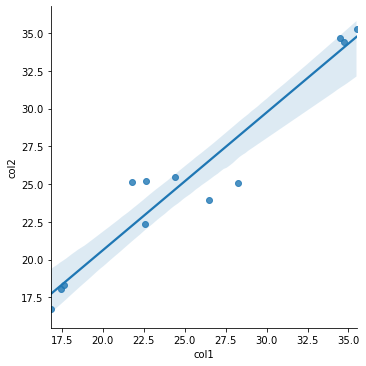

In [183]:
sns.lmplot(x='col1',y='col2',data=check)

In [184]:
# Evaluating model on 2010 data. 

In [187]:
X_t= df_a_2010.drop(['Value_co2_emissions_kt_by_country','Low-carbon electricity (% electricity)','Electricity from renewables (TWh)'],axis= 1)
y_t= df_a_2010['Value_co2_emissions_kt_by_country']

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita
724,0.789220,0.533098,0.225826,27.458969,3.209185,0.490552,1.019233,1.528969,0.198202
3512,0.791595,0.958810,0.137043,23.796056,34.649669,1.898276,0.630030,0.368557,2.111037


In [189]:
predictions_2010= grid_search.predict(X_t)

In [191]:

print("mean absolute error",mean_absolute_error(y_t,predictions_2010))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_t,predictions_2010))
print("root mean square error",np.sqrt(mean_squared_error(y_t,predictions_2010)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_t,predictions_2010))



mean absolute error 2.6959578488506395
r2 score 0.9277335412826025
mean squared error 7.322658652266174
root mean square error 2.7060411401651256
mean absoute percentage error 0.11191928310122065
